<a href="https://colab.research.google.com/github/fahminanursalma/fahminanursalma.github.io/blob/main/new_10062023Ensemble_model_OS_fingerprinting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ensemble learning achitecture.

Ensemble learning is a machine learning technique that involves combining multiple individual models (often called base models or weak learners) to make more accurate predictions or decisions.



In [1]:
import pandas as pd
from google.colab import files

# Uploading the CSV file
uploaded = files.upload()



Saving labeled_dataset (2).csv to labeled_dataset (2) (1).csv


In [2]:
# Load the dataset
dataraw = pd.read_csv('/content/labeled_dataset (2).csv')

In [ ]:
dataraw.head()

,ip.version,ip.hdr_len,ip.id,ip.flags,ip.flags.rb,ip.flags.df,ip.flags.mf,ip.frag_offset,ip.ttl,ip.proto,...,tcp.flags.syn,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,tcp.flags.urg,tcp.flags.cwr,tcp.window_size,tcp.checksum,tcp.urgent_pointer,os
0,4,20,0x00000f79,0x00000040,0,1,0,0,128,6,...,1,0,0,0,0,0,8192,0x0000aca1,0,Win 10
1,4,20,0x00000f7a,0x00000040,0,1,0,0,128,6,...,0,0,0,1,0,0,66048,0x00003692,0,Win 10
2,4,20,0x00000f7b,0x00000040,0,1,0,0,128,6,...,0,0,1,1,0,0,66048,0x00009fb2,0,Win 10
3,4,20,0x00000f7c,0x00000040,0,1,0,0,128,6,...,0,0,0,1,0,0,66048,0x00002a58,0,Win 10
4,4,20,0x00000f7d,0x00000040,0,1,0,0,128,6,...,0,0,1,1,0,0,65280,0x00002d45,0,Win 10


In [3]:
dataraw.dtypes

ip.version             int64
ip.hdr_len             int64
ip.id                 object
ip.flags              object
ip.flags.rb            int64
ip.flags.df            int64
ip.flags.mf            int64
ip.frag_offset         int64
ip.ttl                 int64
ip.proto               int64
ip.checksum           object
ip.src                object
ip.dst                object
ip.len                 int64
ip.dsfield            object
tcp.srcport            int64
tcp.dstport            int64
tcp.seq                int64
tcp.ack                int64
tcp.len                int64
tcp.hdr_len            int64
tcp.flags             object
tcp.flags.fin          int64
tcp.flags.syn          int64
tcp.flags.reset        int64
tcp.flags.push         int64
tcp.flags.ack          int64
tcp.flags.urg          int64
tcp.flags.cwr          int64
tcp.window_size        int64
tcp.checksum          object
tcp.urgent_pointer     int64
os                    object
dtype: object

In [4]:
import pandas as pd

# Create a sample DataFrame
df = pd.read_csv("/content/labeled_dataset (2).csv")

# Select specific columns using iloc
selected_columns = df.iloc[:, [0, 2]]  # Select columns at positions 0 and 2

print(selected_columns)

       ip.version       ip.id
0               4  0x00000f79
1               4  0x00000f7a
2               4  0x00000f7b
3               4  0x00000f7c
4               4  0x00000f7d
...           ...         ...
48957           4  0x000078f1
48958           4  0x0000d434
48959           4  0x0000666b
48960           4  0x0000202f
48961           4  0x00007724

[48962 rows x 2 columns]


In [5]:
import matplotlib.pyplot as plt

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score

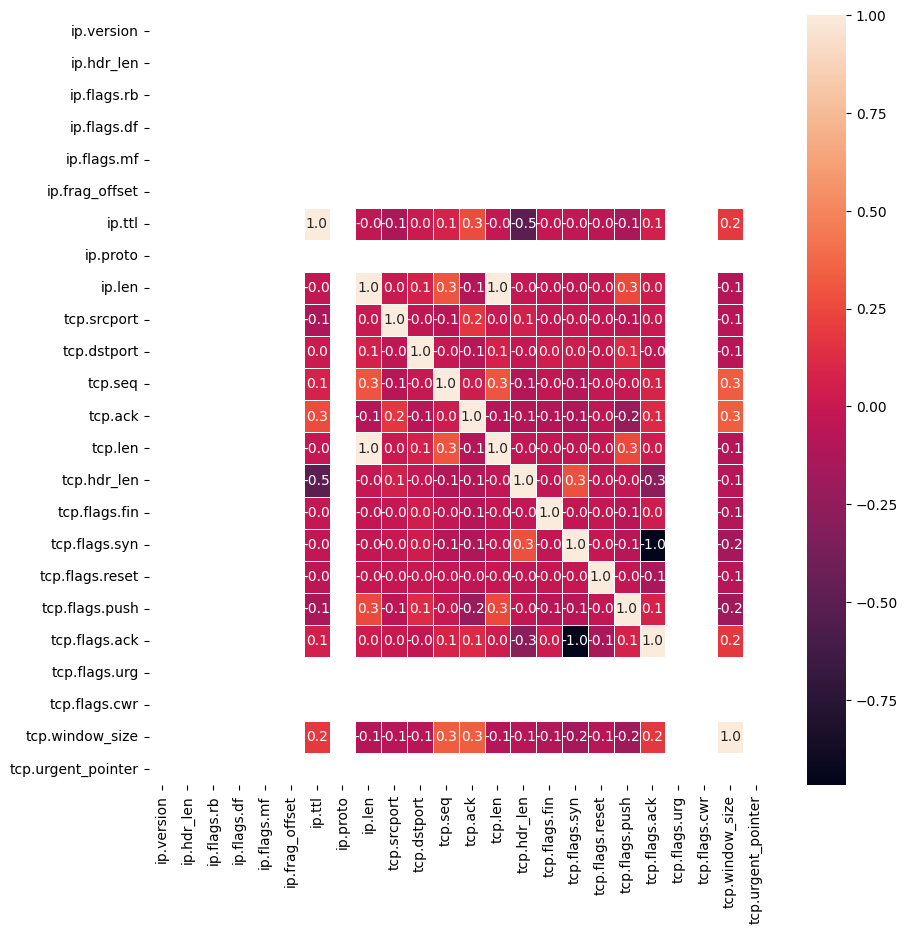

In [7]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(dataraw.corr(), annot=True, linewidth=0.5, fmt='.1f', ax=ax)
plt.show()

<Axes: ylabel='ip.len'>

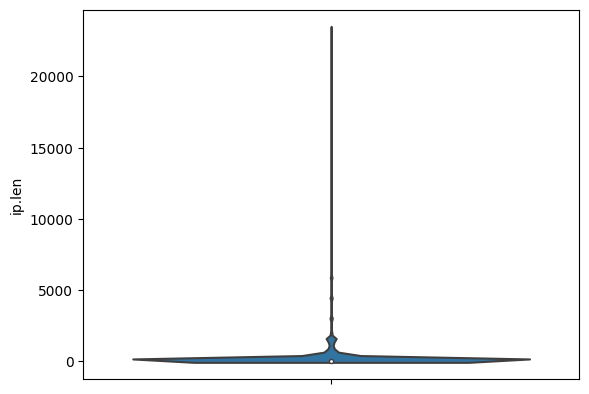

In [8]:
sns.violinplot(y='ip.len', data=df)

<Axes: ylabel='tcp.ack'>

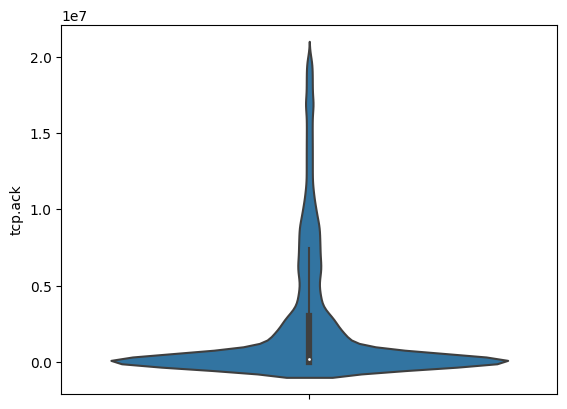

In [9]:
sns.violinplot(y='tcp.ack',data=df)

<Axes: ylabel='tcp.flags.ack'>

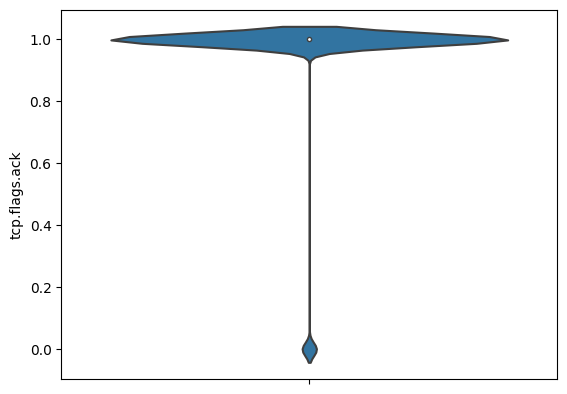

In [10]:
sns.violinplot(y='tcp.flags.ack',data=df)

<Axes: ylabel='tcp.flags.reset'>

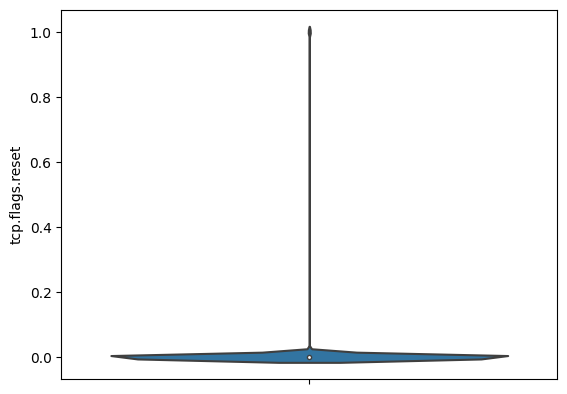

In [11]:
sns.violinplot(y='tcp.flags.reset',data=df)

<Axes: ylabel='tcp.dstport'>

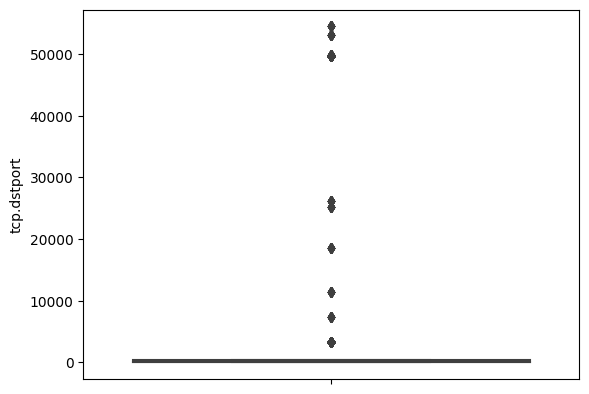

In [12]:
sns.boxplot(y='tcp.dstport',data=df)

<Axes: ylabel='tcp.flags.fin'>

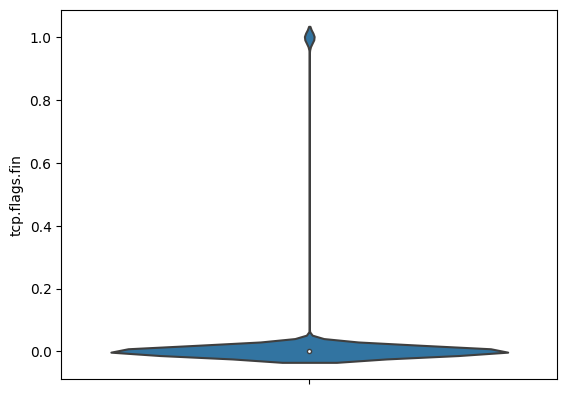

In [13]:
sns.violinplot(y='tcp.flags.fin',data=df)

numerical encoding of the data

In [14]:
# Select the columns to encode (excluding the label column)
columns_to_encode = dataraw.columns[:-1]

# Numerically encode the selected columns
for column in columns_to_encode:
    dataraw[column] = pd.factorize(dataraw[column])[0]

# Save the encoded dataset to a new CSV file
dataraw.to_csv('encoded_dataset.csv', index=False)

In [15]:
data = pd.read_csv('/content/encoded_dataset.csv')

In [16]:


# Split the data into features (X) and labels (y)
X = data.iloc[:, :-1]  # Features (all columns except the last one)
y = data.iloc[:, -1]   # Labels (last column)




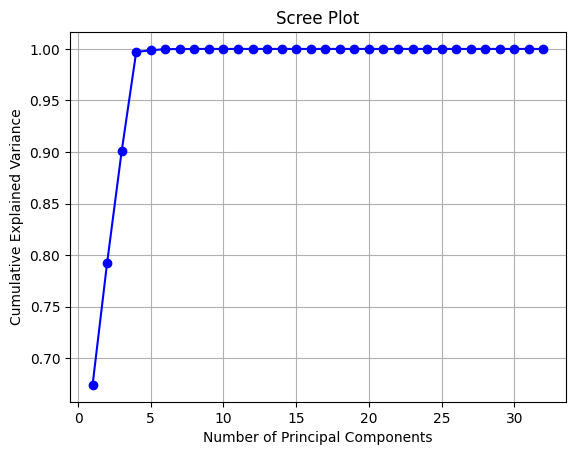

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd  # Import pandas for reading data from files

# Load your own data file here (replace 'your_data.csv' with your actual data file)
data = pd.read_csv('/content/encoded_dataset.csv')

# Assuming that the last column contains the target labels (class labels)
X = data.iloc[:, :-1]  # Features (all columns except the last one)
y = data.iloc[:, -1]   # Target labels (last column)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Scree plot
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()


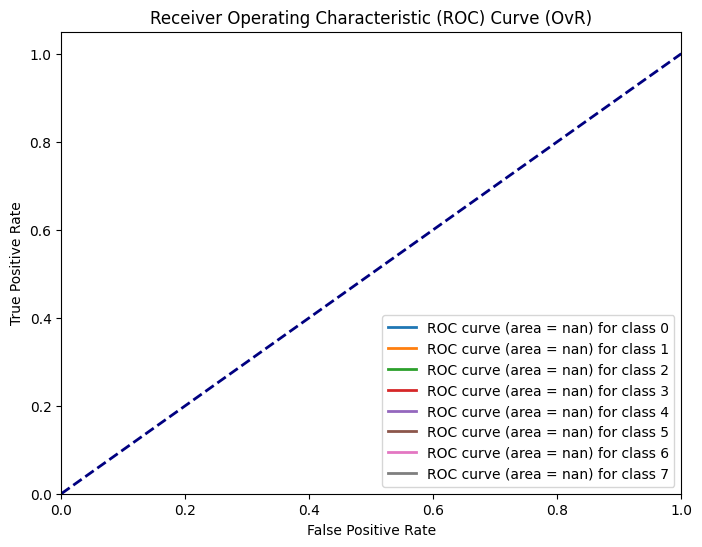

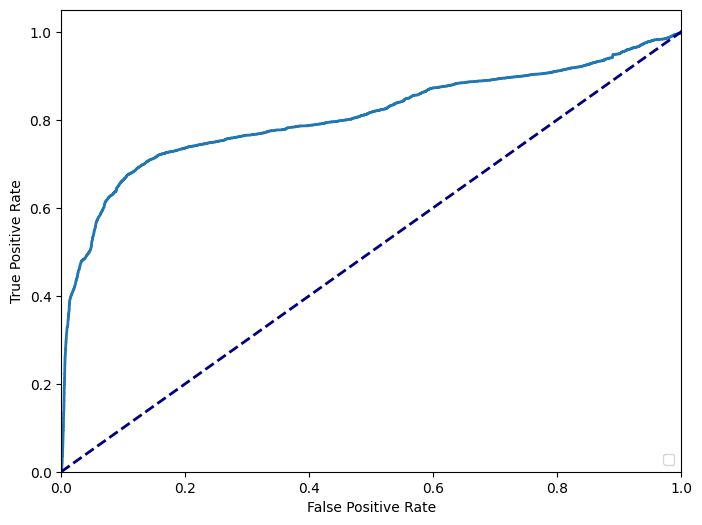

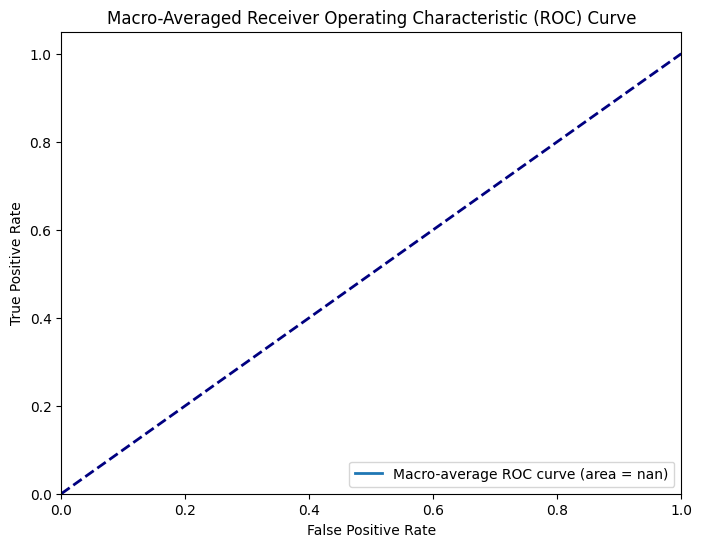

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Load your own data file
data = pd.read_csv('/content/encoded_dataset.csv')

# Assuming that the last column contains the target labels (class labels)
X = data.iloc[:, :-1]  # Features (all columns except the last one)
y = data.iloc[:, -1]   # Target labels (last column)

# Split the dataset into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a classifier (in this case, Logistic Regression)
classifier = LogisticRegression()
classifier.fit(X_train_pca, y_train)

# Predict probabilities for all classes
y_score = classifier.predict_proba(X_test_pca)

# Compute ROC curve and ROC area for each class (OvR)
fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = len(classifier.classes_)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for all classes
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {i}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (OvR)')
plt.legend(loc='lower right')

# Micro-average ROC curve
fpr_micro, tpr_micro, _ = roc_curve(label_binarize(y_test, classes=classifier.classes_).ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

plt.figure(figsize=(8, 6))
plt.plot(fpr_micro, tpr_micro, lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Micro-Averaged Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Macro-average ROC curve
# Calculate the average ROC curve and AUC score
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr_macro = all_fpr
tpr_macro = mean_tpr
roc_auc_macro = auc(fpr_macro, tpr_macro)

plt.figure(figsize=(8, 6))
plt.plot(fpr_macro, tpr_macro, lw=2, label=f'Macro-average ROC curve (area = {roc_auc_macro:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Macro-Averaged Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.show()


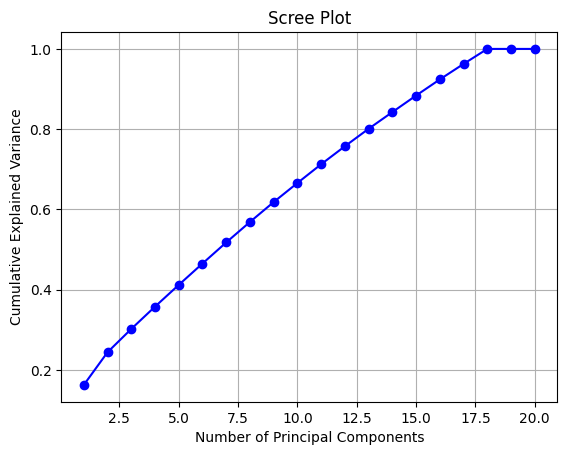

In [19]:
#Feature extraction using PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification

# Generate a sample dataset (replace with your own data)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Scree plot
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()


In [ ]:
#use PCA extracted  values for X
X = X_pca
# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [ ]:
pca = PCA(n_components=10)  # Specify the number of components you want to keep
rf = RandomForestClassifier(n_estimators=100)


In [ ]:
pipeline = Pipeline([('pca', pca), ('rf', rf)])


In [ ]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('pca', PCA(n_components=10)),
                ('rf', RandomForestClassifier())])

In [ ]:
y_pred = pipeline.predict(X_test)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA


In [ ]:
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)


In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X)

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_pca, y)


RandomForestClassifier()

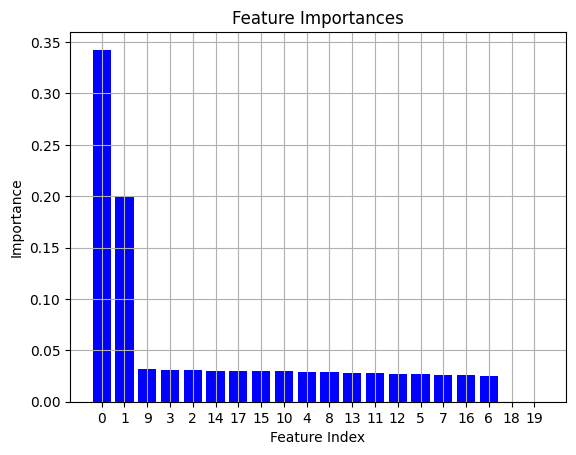

In [ ]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.bar(range(X.shape[1]), importances[indices], color='b', align='center')
plt.xticks(range(X.shape[1]), indices)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.grid(True)
plt.show()


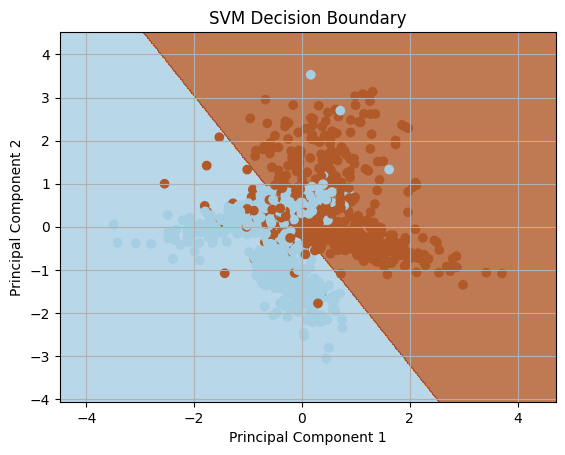

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# Generate a sample dataset (replace with your own data)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Perform PCA
pca = PCA(n_components=2)  # Specify the number of components you want to keep
X_pca = pca.fit_transform(X)

# Scale the PCA-transformed data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

# Create an SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_scaled, y)

# Plotting the decision boundary
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary')
plt.grid(True)
plt.show()


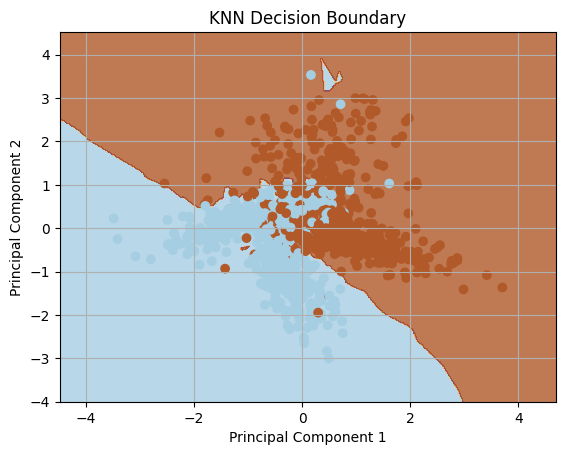

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# Generate a sample dataset (replace with your own data)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Perform PCA
pca = PCA(n_components=2)  # Specify the number of components you want to keep
X_pca = pca.fit_transform(X)

# Scale the PCA-transformed data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)

# Plotting the decision boundary
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KNN Decision Boundary')
plt.grid(True)
plt.show()



Accuracy: 0.974


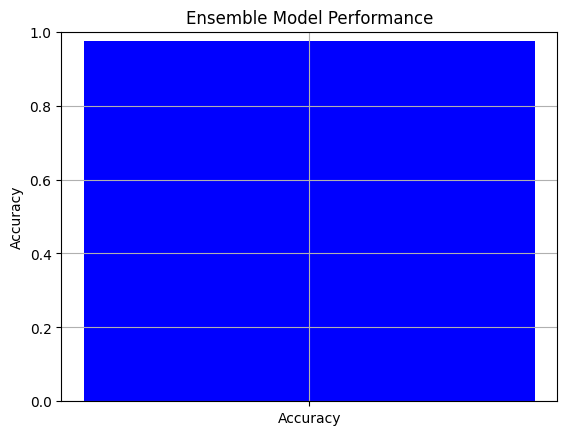

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# Generate a sample dataset (replace with your own data)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Create individual base classifiers
svm = SVC(kernel='linear')
dt = DecisionTreeClassifier()
mlp = MLPClassifier()

# Create a multimodal ensemble model
ensemble = VotingClassifier(estimators=[('svm', svm), ('dt', dt), ('mlp', mlp)], voting='hard')
ensemble.fit(X_pca, y)

# Perform predictions using the ensemble model
y_pred = ensemble.predict(X_pca)

# Calculate accuracy
accuracy = np.mean(y_pred == y)
print(f"Accuracy: {accuracy}")

# Plotting the accuracy
plt.bar(['Accuracy'], [accuracy], color='b')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Ensemble Model Performance')
plt.grid(True)
plt.show()


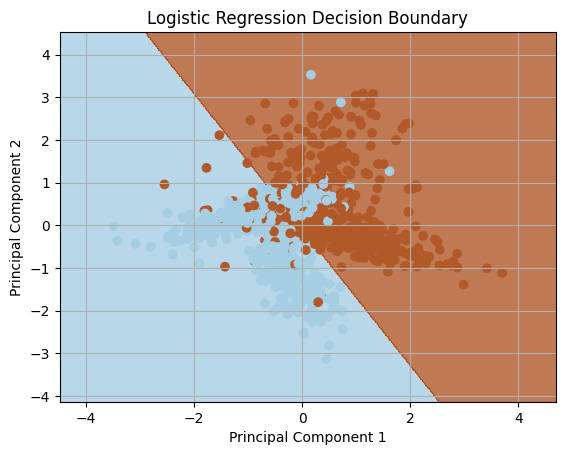

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# Generate a sample dataset (replace with your own data)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Perform PCA
pca = PCA(n_components=2)  # Specify the number of components you want to keep
X_pca = pca.fit_transform(X)

# Scale the PCA-transformed data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

# Create a logistic regression classifier
logreg = LogisticRegression()
logreg.fit(X_scaled, y)

# Plotting the decision boundary
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Logistic Regression Decision Boundary')
plt.grid(True)
plt.show()


base model initialization

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Initialize the base models
model1 = DecisionTreeClassifier()
model2 = RandomForestClassifier()
model3 = SVC()
model4 = MLPClassifier()


 Combine the base models using the VotingClassifier ensemble method, which aggregates the predictions from each model and selects the majority vote as the final prediction.

In [ ]:
from sklearn.ensemble import VotingClassifier

# Create the ensemble
ensemble = VotingClassifier(estimators=[('dt', model1), ('rf', model2), ('svm', model3), ('mlp', model4)], voting='hard')


Create ensemble for random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier


In [ ]:
model1 = RandomForestClassifier(n_estimators=100, max_depth=5)
model2 = RandomForestClassifier(n_estimators=50, max_depth=10)
model3 = RandomForestClassifier(n_estimators=200, max_depth=3)


In [ ]:
ensemble = VotingClassifier(estimators=[('rf1', model1), ('rf2', model2), ('rf3', model3)], voting='hard')


In [ ]:
ensemble.fit(X_train, y_train)


VotingClassifier(estimators=[('rf1', RandomForestClassifier(max_depth=5)),
                             ('rf2',
                              RandomForestClassifier(max_depth=10,
                                                     n_estimators=50)),
                             ('rf3',
                              RandomForestClassifier(max_depth=3,
                                                     n_estimators=200))])

In [ ]:
y_pred = ensemble.predict(X_test)


train

In [ ]:
# Train the ensemble model
ensemble.fit(X_train, y_train)

# Predict the labels for the testing data
predictions = ensemble.predict(X_test)



In [ ]:
predictions = ensemble.predict(X_test)

evaluate model accuracy

In [ ]:
# Evaluate the accuracy of the ensemble model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.83


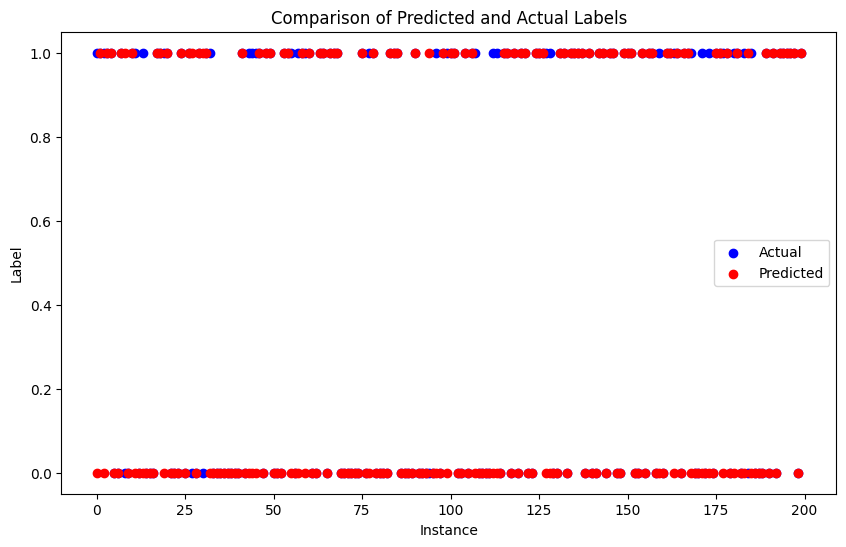

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already trained your ensemble model and obtained the predicted labels and actual labels
predicted_labels = ensemble.predict(X_test)
actual_labels = y_test

# Create a plot comparing predicted labels with actual labels
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(actual_labels)), actual_labels, color='blue', label='Actual')
plt.scatter(np.arange(len(predicted_labels)), predicted_labels, color='red', label='Predicted')
plt.xlabel('Instance')
plt.ylabel('Label')
plt.title('Comparison of Predicted and Actual Labels')
plt.legend()
plt.show()


Confusion Matrix
The resulting plot will display the confusion matrix, with the true labels on the y-axis and the predicted labels on the x-axis. The values within the matrix represent the counts of true positives, true negatives, false positives, and false negatives

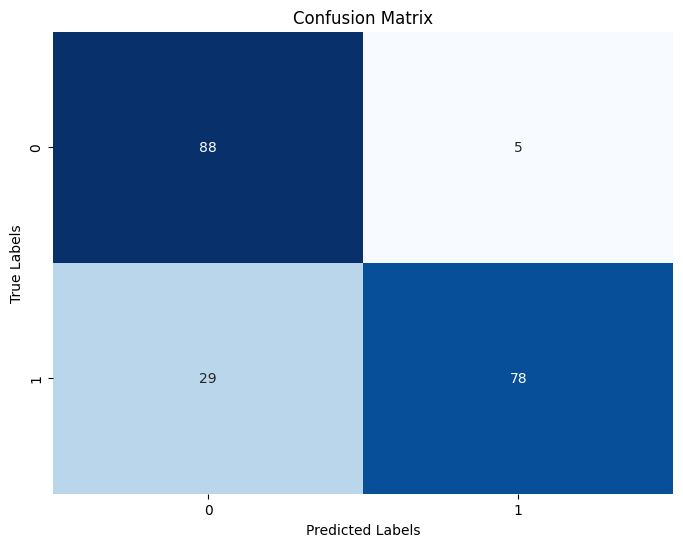

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# true labels r stored in a variable called 'y_tesr' and the predicted labels in 'predictions'
# Compute the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a figure for the confusion matrix
plt.figure(figsize=(8, 6))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)

# Customize the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Confusion matrix for random Forest

In [ ]:
rf = RandomForestClassifier()
svm = SVC()
knn = KNeighborsClassifier()


In [ ]:
estimators = [
    ('random_forest', rf),
    ('svm', svm),
    ('knn', knn)
]


In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators, voting='hard')


Multi-modal Voting Classification Model

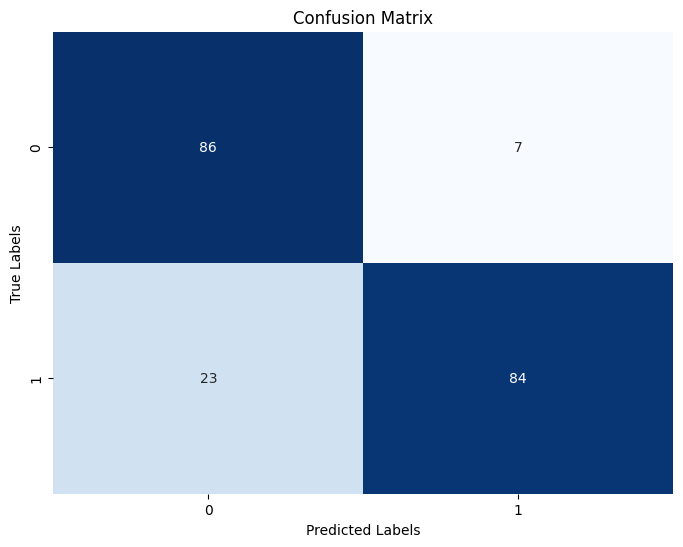

Accuracy: 0.85
Efficiency: 0.85


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Assuming you have a trained Random Forest Classifier 'rf', SVM Classifier 'svm',
# and KNN Classifier 'knn' and test data 'X_test' and 'y_test'

# Initialize the classifiers
rf = RandomForestClassifier()
svm = SVC()
knn = KNeighborsClassifier()

# Fit the individual classifiers
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)
knn.fit(X_train, y_train)

# Create a list of tuples with the classifiers
estimators = [
    ('random_forest', rf),
    ('svm', svm),
    ('knn', knn)
]

# Initialize the Multimodal Voting Classifier
voting_clf = VotingClassifier(estimators, voting='hard')

# Fit the VotingClassifier
voting_clf.fit(X_train, y_train)

# Perform predictions using the Multimodal Voting Classifier
predictions = voting_clf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Calculate accuracy and efficiency
accuracy = np.trace(cm) / np.sum(cm)
efficiency = np.trace(cm) / np.sum(cm, axis=1).sum()

# Create a figure for the confusion matrix
plt.figure(figsize=(8, 6))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)

# Customize the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print("Accuracy:", accuracy)
print("Efficiency:", efficiency)


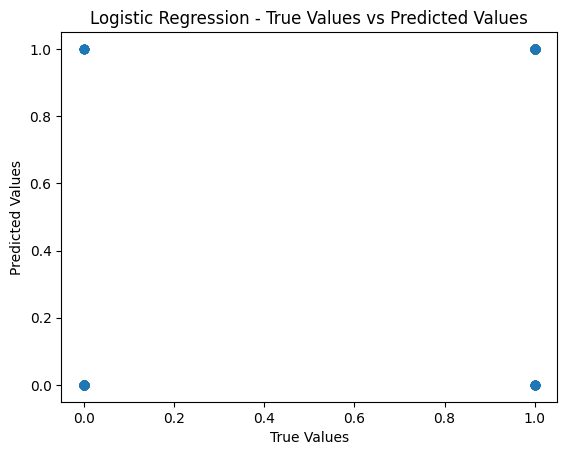

Mean Squared Error: 0.145


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression

# Assuming you have a trained Logistic Regression model and test data 'X_test' and 'y_test'

# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Fit the Logistic Regression model
logreg.fit(X_train, y_train)

# Perform predictions using the Logistic Regression model
predictions = logreg.predict(X_test)

# Calculate mean squared error (Note: Logistic Regression uses different evaluation metrics)
mse = mean_squared_error(y_test, predictions)

# Create a scatter plot of true values vs predicted values
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Logistic Regression - True Values vs Predicted Values')
plt.show()

print("Mean Squared Error:", mse)


COnfusion Matrix code for SVM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

# Assuming you have a trained SVM classifier 'svm' and test data 'X_test' and 'y_test'

# Perform predictions using the SVM classifier
predictions = svm.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Calculate accuracy and efficiency
accuracy = np.trace(cm) / np.sum(cm)
efficiency = np.trace(cm) / np.sum(cm, axis=1).sum()

# Create a figure for the confusion matrix
plt.figure(figsize=(8, 6))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)

# Customize the plot
plt.title('Confusion Matrix SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
print("Accuracy:", accuracy)
print("Efficiency:", efficiency)


Confusion Matrix code for KNN

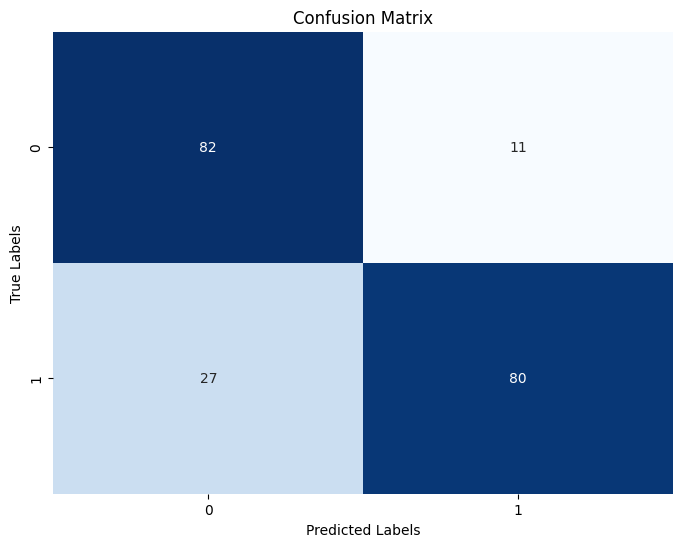

Accuracy: 0.81
Efficiency: 0.81


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Assuming you have a trained KNN classifier 'knn' and test data 'X_test' and 'y_test'

# Perform predictions using the KNN classifier
predictions = knn.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, predictions)
# Calculate accuracy and efficiency
accuracy = np.trace(cm) / np.sum(cm)
efficiency = np.trace(cm) / np.sum(cm, axis=1).sum()

# Create a figure for the confusion matrix
plt.figure(figsize=(8, 6))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)

# Customize the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
print("Accuracy:", accuracy)
print("Efficiency:", efficiency)

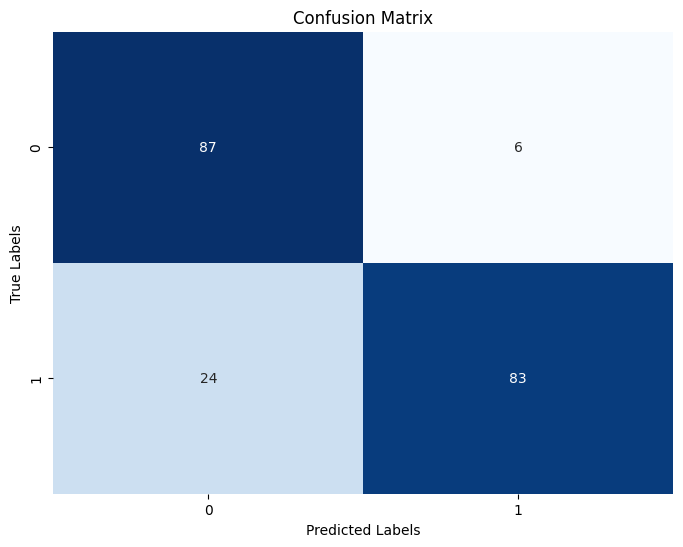

Accuracy: 0.85
Efficiency: 0.85


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Assuming you have a trained Random Forest classifier 'rf' and test data 'X_test' and 'y_test'

# Perform predictions using the Random Forest classifier
predictions = rf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Calculate accuracy and efficiency
accuracy = np.trace(cm) / np.sum(cm)
efficiency = np.trace(cm) / np.sum(cm, axis=1).sum()

# Create a figure for the confusion matrix
plt.figure(figsize=(8, 6))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)

# Customize the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
print("Accuracy:", accuracy)
print("Efficiency:", efficiency)


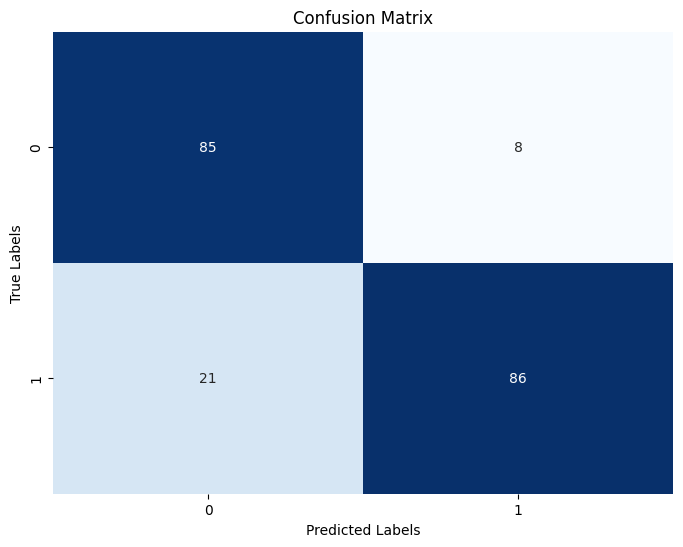

Accuracy: 0.855
Efficiency: 0.855


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

# Assuming you have a trained logistic regression classifier 'logreg' and test data 'X_test' and 'y_test'
#X_test_selected = X_test[:, :2]  # Select first two features
#X_test_selected = X_test[:, :2]  # Select first two features
predictions = logreg.predict(X_test)



# Compute the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Calculate accuracy and efficiency
accuracy = np.trace(cm) / np.sum(cm)
efficiency = np.trace(cm) / np.sum(cm, axis=1).sum()

# Create a figure for the confusion matrix
plt.figure(figsize=(8, 6))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)

# Customize the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print("Accuracy:", accuracy)
print("Efficiency:", efficiency)



Measuring OS utilization


In [ ]:
!pip install psutil


In [ ]:
import psutil


current CPU utilization  and memory usage functions

In [ ]:
import psutil
import time

# Function to measure CPU utilization
def measure_cpu_utilization():
    cpu_percent = psutil.cpu_percent(interval=1)
    return cpu_percent

# Function to measure memory usage
def measure_memory_usage():
    memory_info = psutil.virtual_memory()
    memory_percent = memory_info.percent
    return memory_percent


In [ ]:


start_time = time.time()
# Run the ensemble algorithm
predictions = ensemble.predict(X_test)

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution Time: {execution_time} seconds")

# Measure CPU utilization
cpu_utilization = measure_cpu_utilization()
print(f"CPU Utilization: {cpu_utilization}%")

# Measure memory usage
memory_usage = measure_memory_usage()
print(f"Memory Usage: {memory_usage}%")


Execution Time: 0.05503702163696289 seconds
CPU Utilization: 90.5%
Memory Usage: 9.4%


In [ ]:
import time
import psutil
from sklearn.svm import SVC

start_time = time.time()

# Assuming you have a trained SVM classifier 'svm' and test data 'X_test'

# Run the SVM algorithm
predictions = svm.predict(X_test)

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution Time: {execution_time} seconds")

# Measure CPU utilization
cpu_utilization = psutil.cpu_percent()
print(f"CPU Utilization: {cpu_utilization}%")

# Measure memory usage
memory_usage = psutil.virtual_memory().percent
print(f"Memory Usage: {memory_usage}%")


Execution Time: 0.019062280654907227 seconds
CPU Utilization: 89.4%
Memory Usage: 10.7%


In [ ]:
import time
import psutil
from sklearn.ensemble import RandomForestClassifier

start_time = time.time()

# Assuming you have a trained random forest classifier 'rf' and test data 'X_test'

# Run the random forest algorithm
predictions = rf.predict(X_test)

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution Time: {execution_time} seconds")

# Measure CPU utilization
cpu_utilization = psutil.cpu_percent()
print(f"CPU Utilization: {cpu_utilization}%")

# Measure memory usage
memory_usage = psutil.virtual_memory().percent
print(f"Memory Usage: {memory_usage}%")


Execution Time: 0.049031734466552734 seconds
CPU Utilization: 87.0%
Memory Usage: 11.3%


In [ ]:
import time
import psutil
from sklearn.neighbors import KNeighborsClassifier

start_time = time.time()

# Assuming you have a trained KNN classifier 'knn' and test data 'X_test'

# Run the KNN algorithm
predictions = knn.predict(X_test)

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution Time: {execution_time} seconds")

# Measure CPU utilization
cpu_utilization = psutil.cpu_percent()
print(f"CPU Utilization: {cpu_utilization}%")

# Measure memory usage
memory_usage = psutil.virtual_memory().percent
print(f"Memory Usage: {memory_usage}%")


Execution Time: 0.014302968978881836 seconds
CPU Utilization: 87.2%
Memory Usage: 11.5%


In [ ]:
import time
import psutil

start_time = time.time()

# Assuming you have a trained multimodal ensemble model 'ensemble' and test data 'X_test'

# Run the multimodal ensemble model
predictions = ensemble.predict(X_test)

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution Time: {execution_time} seconds")

# Measure CPU utilization
cpu_utilization = psutil.cpu_percent()
print(f"CPU Utilization: {cpu_utilization}%")

# Measure memory usage
memory_usage = psutil.virtual_memory().percent
print(f"Memory Usage: {memory_usage}%")


Execution Time: 0.05335497856140137 seconds
CPU Utilization: 8.8%
Memory Usage: 11.6%


In [ ]:
from sklearn.linear_model import LogisticRegression

# Assuming you have training data 'X_train' and corresponding target labels 'y_train'

# Create and train the logistic regression model
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)


LogisticRegression()

In [ ]:
import time
import psutil
from sklearn.linear_model import LogisticRegression

start_time = time.time()

# Assuming you have a trained linear regression model 'linear_reg' and test data 'X_test'
#X_test_selected = X_test[:, :2]  # Select first two features
predictions = logreg.predict(X_test)



end_time = time.time()
execution_time = end_time - start_time

print(f"Execution Time: {execution_time} seconds")

# Measure CPU utilization
cpu_utilization = psutil.cpu_percent()
print(f"CPU Utilization: {cpu_utilization}%")

# Measure memory usage
memory_usage = psutil.virtual_memory().percent
print(f"Memory Usage: {memory_usage}%")


Execution Time: 0.0005917549133300781 seconds
CPU Utilization: 27.6%
Memory Usage: 12.4%


Implementing the trust based algorithm using the same dataset

In [ ]:
import pandas as pd
df = pd.read_csv('/content/labeled_dataset (2).csv')
# Preprocess the dataset as needed


In [ ]:
print(df.columns)


Index(['ip.version', 'ip.hdr_len', 'ip.id', 'ip.flags', 'ip.flags.rb',
       'ip.flags.df', 'ip.flags.mf', 'ip.frag_offset', 'ip.ttl', 'ip.proto',
       'ip.checksum', 'ip.src', 'ip.dst', 'ip.len', 'ip.dsfield',
       'tcp.srcport', 'tcp.dstport', 'tcp.seq', 'tcp.ack', 'tcp.len',
       'tcp.hdr_len', 'tcp.flags', 'tcp.flags.fin', 'tcp.flags.syn',
       'tcp.flags.reset', 'tcp.flags.push', 'tcp.flags.ack', 'tcp.flags.urg',
       'tcp.flags.cwr', 'tcp.window_size', 'tcp.checksum',
       'tcp.urgent_pointer', 'os'],
      dtype='object')


In [ ]:
# Assuming 'df' is your DataFrame containing the network data
successful_transmissions = df[df['tcp.flags.ack'] == 1]
failed_transmissions = df[df['tcp.flags.reset'] == 1]


In [ ]:
good_behavior = df[df['tcp.flags.ack'] == 1]
bad_behavior = df[df['tcp.flags.reset'] == 1]


In [ ]:
# Example: Calculate frequencies of good and bad behaviors
good_behavior_frequency = len(good_behavior)
bad_behavior_frequency = len(bad_behavior)


In [ ]:
alpha = np.sum(good_behavior_frequency) + 1
beta = np.sum(bad_behavior_frequency) + 1


In [ ]:
import numpy as np

# Define the trust-based prediction model using veto algorithm
def trust_veto_prediction(scores, threshold):
    # Calculate the veto score
    veto_score = np.min(scores)

    if veto_score >= threshold:
        # Make prediction based on veto score
        prediction = np.argmax(scores)
        return prediction
    else:
        # Indicate ambiguity or conflicting results
        return None

# Define the trust generator equation using beta distribution
def trust_generator(alpha, beta):
    # Generate trust evidence using beta distribution
    trust_evidence = np.random.beta(alpha, beta)
    return trust_evidence

# Example usage of trust-based prediction model and trust generator
threshold = 0.8  # Veto threshold for trust-based prediction
alpha = 2  # Alpha parameter for trust generator
beta = 2  # Beta parameter for trust generator

# Generate example trust scores for three algorithms
scores = [0.9, 0.85, 0.95]

# Use the trust-based prediction model
prediction = trust_veto_prediction(scores, threshold)
if prediction is not None:
    print("Trust-based prediction:", prediction)
else:
    print("Ambiguous or conflicting results")

# Use the trust generator equation
trust_evidence = trust_generator(alpha, beta)
print("Trust evidence:", trust_evidence)


Trust-based prediction: 2
Trust evidence: 0.3687096572311137


In [ ]:
import time
import psutil
import numpy as np

# Define the trust-based prediction model using the veto algorithm
def trust_veto_prediction(scores, threshold):
    veto_score = np.min(scores)

    if veto_score >= threshold:
        prediction = np.argmax(scores)
        return prediction
    else:
        return None

# Define the trust generator equation using the beta distribution
def trust_generator(alpha, beta):
    trust_evidence = np.random.beta(alpha, beta)
    return trust_evidence

# Example usage of the trust-based prediction model and trust generator
threshold = 0.8  # Veto threshold for trust-based prediction
alpha = 2  # Alpha parameter for trust generator
beta = 2  # Beta parameter for trust generator

# Generate example trust scores for three algorithms
scores = [0.9, 0.85, 0.95]

# Measure CPU utilization
cpu_utilization = psutil.cpu_percent()
print("CPU Utilization:", cpu_utilization, "%")

# Measure memory usage
memory_usage = psutil.virtual_memory().percent
print("Memory Usage:", memory_usage, "%")

# Start measuring execution time
start_time = time.time()

# Use the trust-based prediction model
prediction = trust_veto_prediction(scores, threshold)
if prediction is not None:
    print("Trust-based prediction:", prediction)
else:
    print("Ambiguous or conflicting results")

# Use the trust generator equation
trust_evidence = trust_generator(alpha, beta)
print("Trust evidence:", trust_evidence)

# Calculate execution time
end_time = time.time()
execution_time = end_time - start_time
print("Execution Time:", execution_time, "seconds")


CPU Utilization: 27.0 %
Memory Usage: 14.7 %
Trust-based prediction: 2
Trust evidence: 0.2728806198690185
Execution Time: 0.002773761749267578 seconds


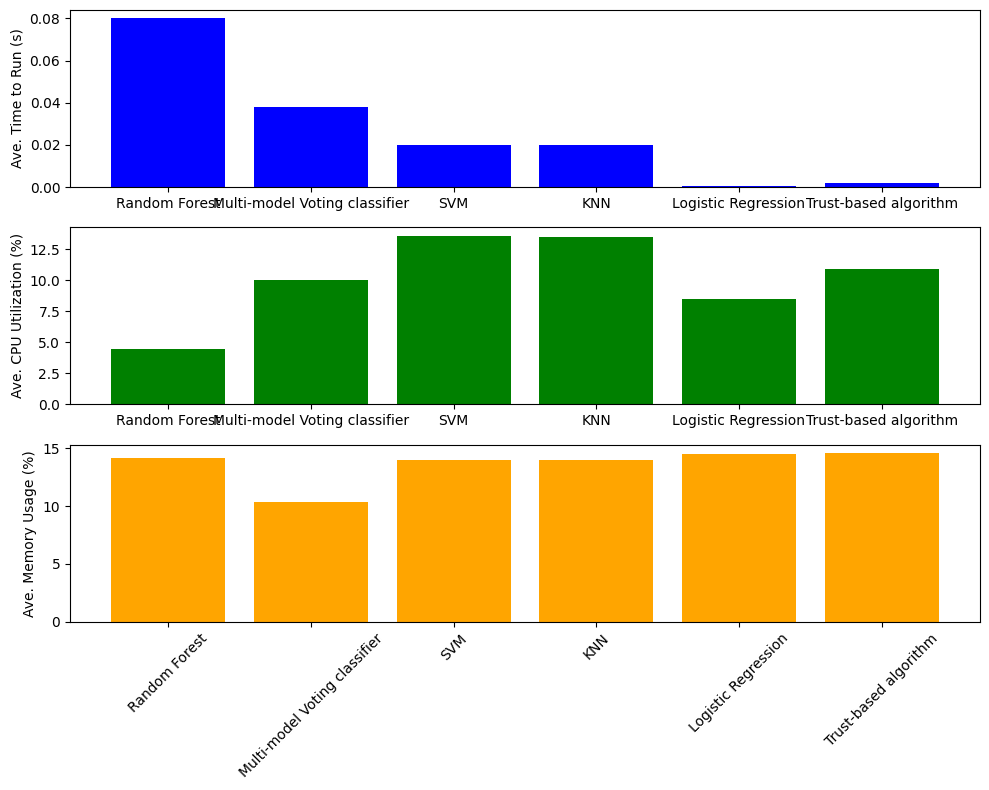

In [ ]:
import matplotlib.pyplot as plt

# Data for the table
algorithms = ['Random Forest', 'Multi-model Voting classifier', 'SVM', 'KNN', 'Logistic Regression', 'Trust-based algorithm']
time_to_run = [0.08, 0.038, 0.02, 0.02, 0.0005, 0.002]
cpu_utilization = [4.5, 10.0, 13.6, 13.5, 8.5, 10.9]
memory_usage = [14.2, 10.4, 14.0, 14.0, 14.5, 14.6]

# Create a figure and subplots
fig, ax = plt.subplots(3, 1, figsize=(10, 8))

# Plot average time to run
ax[0].bar(algorithms, time_to_run, color='blue')
ax[0].set_ylabel('Ave. Time to Run (s)')

# Plot average CPU utilization
ax[1].bar(algorithms, cpu_utilization, color='green')
ax[1].set_ylabel('Ave. CPU Utilization (%)')

# Plot average memory usage
ax[2].bar(algorithms, memory_usage, color='orange')
ax[2].set_ylabel('Ave. Memory Usage (%)')

# Customize the plots
plt.xticks(rotation=45)
plt.tight_layout()

# Show the graph
plt.show()


In [ ]:
import time
import psutil
import numpy as np
from sklearn.metrics import accuracy_score

# Define the trust-based prediction model using the veto algorithm
def trust_veto_prediction(scores, threshold):
    veto_score = np.min(scores)

    if veto_score >= threshold:
        prediction = np.argmax(scores)
        return prediction
    else:
        return None

# Define the trust generator equation using the beta distribution
def trust_generator(alpha, beta):
    trust_evidence = np.random.beta(alpha, beta)
    return trust_evidence

# Example usage of the trust-based prediction model and trust generator
threshold = 0.8  # Veto threshold for trust-based prediction
alpha = 2  # Alpha parameter for trust generator
beta = 2  # Beta parameter for trust generator

# Generate example trust scores for three algorithms
scores = [0.9, 0.85, 0.95]

# Ground truth labels (replace with your actual labels)
ground_truth_labels = [1, 0, 1]

# Measure CPU utilization
cpu_utilization = psutil.cpu_percent()
print("CPU Utilization:", cpu_utilization, "%")

# Measure memory usage
memory_usage = psutil.virtual_memory().percent
print("Memory Usage:", memory_usage, "%")

# Start measuring execution time
start_time = time.time()

# Use the trust-based prediction model for each instance
predicted_labels = []
for score in scores:
    prediction = trust_veto_prediction([score], threshold)
    if prediction is not None:
        predicted_labels.append(prediction)
    else:
        # Handle the case when prediction is None
        predicted_labels.append(-1)  # Choose an appropriate default label

print("Trust-based predictions:", predicted_labels)

# Use the trust generator equation
trust_evidence = trust_generator(alpha, beta)
print("Trust evidence:", trust_evidence)

# Calculate accuracy
accuracy = accuracy_score(ground_truth_labels, predicted_labels)

print("Accuracy:", accuracy)

# Calculate execution time
end_time = time.time()
execution_time = end_time - start_time
print("Execution Time:", execution_time, "seconds")


CPU Utilization: 12.4 %
Memory Usage: 14.7 %
Trust-based predictions: [0, 0, 0]
Trust evidence: 0.8749156104715912
Accuracy: 0.3333333333333333
Execution Time: 0.00323486328125 seconds


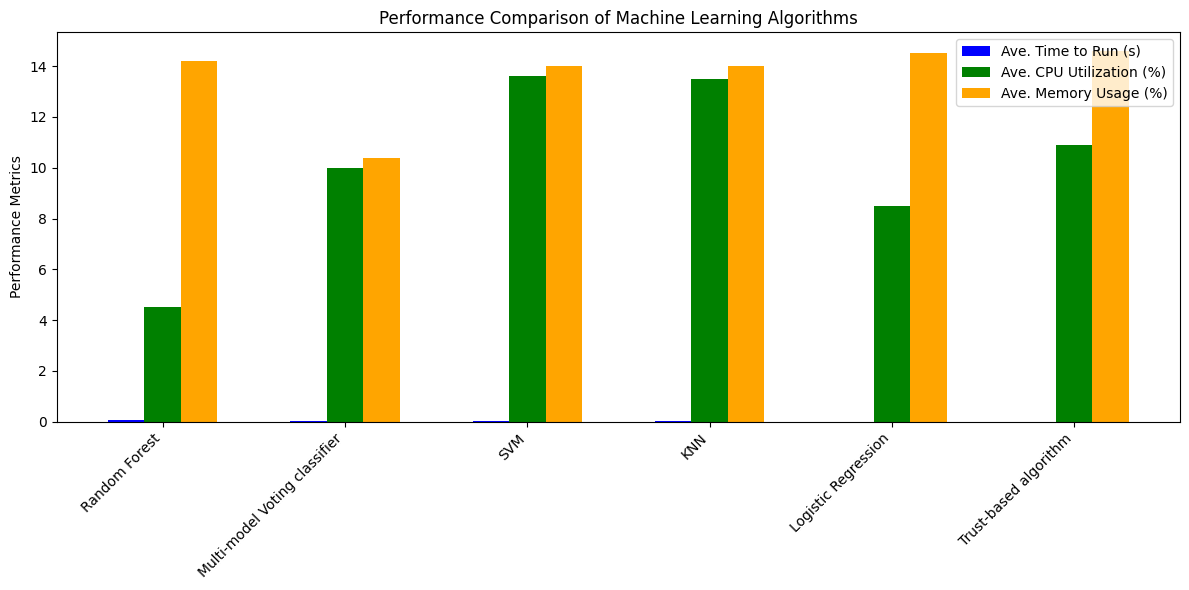

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the table
algorithms = ['Random Forest', 'Multi-model Voting classifier', 'SVM', 'KNN', 'Logistic Regression', 'Trust-based algorithm']
time_to_run = [0.08, 0.038, 0.02, 0.02, 0.0005, 0.002]
cpu_utilization = [4.5, 10.0, 13.6, 13.5, 8.5, 10.9]
memory_usage = [14.2, 10.4, 14.0, 14.0, 14.5, 14.6]

# Create a figure and subplot
fig, ax = plt.subplots(figsize=(12, 6))

# Define the width of each bar
bar_width = 0.2

# Create x-axis values for each group of bars
x = np.arange(len(algorithms))

# Plot average time to run
ax.bar(x - bar_width, time_to_run, width=bar_width, label='Ave. Time to Run (s)', color='blue')

# Plot average CPU utilization
ax.bar(x, cpu_utilization, width=bar_width, label='Ave. CPU Utilization (%)', color='green')

# Plot average memory usage
ax.bar(x + bar_width, memory_usage, width=bar_width, label='Ave. Memory Usage (%)', color='orange')

# Set x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(algorithms, rotation=45, ha='right')

# Set y-axis label
ax.set_ylabel('Performance Metrics')

# Add a legend
ax.legend()

# Set the title
plt.title('Performance Comparison of Machine Learning Algorithms')

# Show the graph
plt.tight_layout()
plt.show()


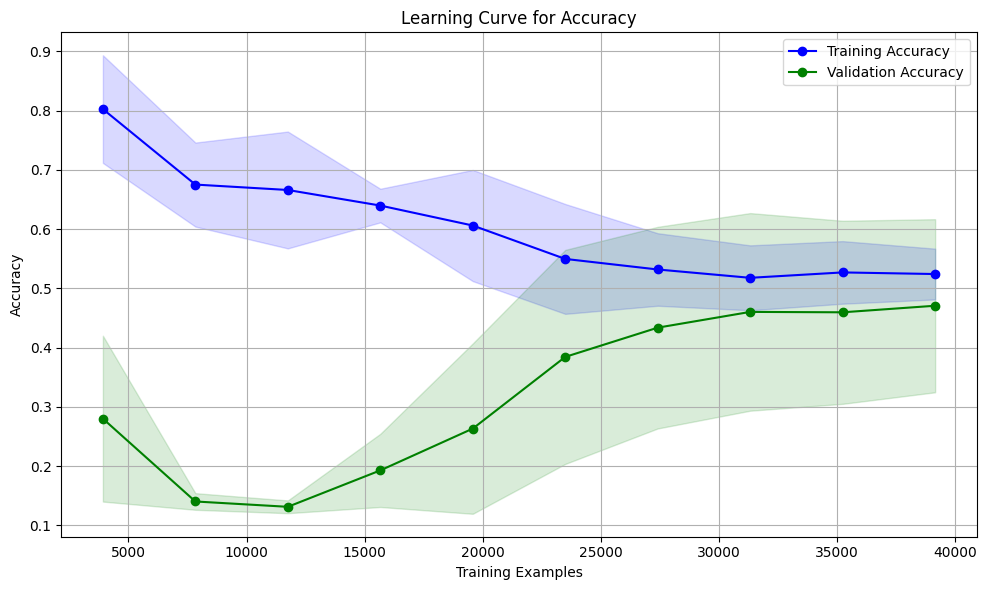

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
import pandas as pd  # Import pandas for reading data from files

# Load your own data file here (replace 'your_data.csv' with your actual data file)
data = pd.read_csv('/content/encoded_dataset.csv')

# Assuming that the last column contains the target labels (class labels)
X = data.iloc[:, :-1]  # Features (all columns except the last one)
y = data.iloc[:, -1]   # Target labels (last column)

# Define the machine learning model (e.g., Logistic Regression)
model = LogisticRegression()

# Create an array of training sizes (e.g., 10% to 100% of the dataset)
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate learning curves for accuracy
train_sizes_abs, train_scores, test_scores = learning_curve(
    model, X, y, train_sizes=train_sizes, scoring='accuracy', cv=5)

# Calculate the mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Create a learning curve plot for accuracy
plt.figure(figsize=(10, 6))
plt.plot(train_sizes_abs, train_mean, marker='o', color='blue', label='Training Accuracy')
plt.fill_between(train_sizes_abs, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes_abs, test_mean, marker='o', color='green', label='Validation Accuracy')
plt.fill_between(train_sizes_abs, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
plt.title('Learning Curve for Accuracy')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()

# Show the learning curve plot for accuracy
plt.tight_layout()
plt.show()
